In [9]:
#1a.Tossing a coin 10000 times
import random
def coin_toss(trails=10000):
    head=0
    tail=0
    for i in range(trails):
        toss=random.choice(['H','T'])
        if toss=='H':
            head+=1
        else:
            tail+=1
    p_head = head/trails
    p_tails = tail/trails
    print(f"Probability of getting heads {p_head}")
    print(f"Probability of getting tails {p_tails}")
coin_toss()

Probability of getting heads 0.4982
Probability of getting tails 0.5018


In [3]:
#1.b Rolling two dice
def dice_roll(trails = 10000):
    sum_seven = 0
    for i in range(trails):
        die1 = random.randint(1,6)
        die2 = random.randint(1,6)
        if die1+die2 == 7:
            sum_seven += 1
    probability = sum_seven / trails
    print(f"Experimental probability :{probability:.4f}")
dice_roll()

Experimental probability :0.1681


In [3]:
#2
import random
def prob_six(trails=10000):
    success = 0
    for _ in range(trails):
        has_six = False
        for _ in range(10):
            roll = random.randint(1,6)
            if roll == 6:
                has_six=True
                break
        if has_six:
            success+=1
    probability = success / trails
    return probability
print("Estimated probability :" ,prob_six())

Estimated probability : 0.8371


In [7]:
#3
import random
# Parameters
balls = ['R']*5 + ['G']*7 + ['B']*8
trials = 1000

# Simulation storage
sequence = []

# Step 1: simulate draws
for _ in range(trials):
    sequence.append(random.choice(balls))

# Step 2: count needed events
prev_blue_count = 0
prev_blue_and_red_count = 0
red_count = 0
blue_count = 0
red_then_blue_count = 0

for i in range(1, len(sequence)):
    prev, curr = sequence[i-1], sequence[i]
    
    # For (a) conditional probability
    if prev == 'B':
        prev_blue_count += 1
        if curr == 'R':
            prev_blue_and_red_count += 1
    
    # For Bayes theorem
    if curr == 'R':
        red_count += 1
        if prev == 'B':
            red_then_blue_count += 1
    if curr == 'B':
        blue_count += 1

# (a) Conditional probability from data
if prev_blue_count > 0:
    prob_red_given_blue = prev_blue_and_red_count / prev_blue_count
else:
    prob_red_given_blue = 0

# (b) Bayes verification
# P(R), P(B), P(B|R), then Bayes
P_R = red_count / (trials-1)
P_B = blue_count / (trials-1)
P_B_given_R = red_then_blue_count / red_count if red_count > 0 else 0
bayes_value = (P_B_given_R * P_R) / P_B if P_B > 0 else 0

print(f"(a) P(Red | Previous Blue) ≈ {prob_red_given_blue:.4f}")
print(f"(b) Bayes Theorem Value   ≈ {bayes_value:.4f}")
print(f"Difference               ≈ {abs(prob_red_given_blue - bayes_value):.6f}")

(a) P(Red | Previous Blue) ≈ 0.2457
(b) Bayes Theorem Value   ≈ 0.2457
Difference               ≈ 0.000000


In [4]:
#4
import numpy as np

#values  and probabilities
values = [1,2,3]
probabilities = [0.25,0.35,0.40]
sample_size = 1000

#generate samples
sample = np.random.choice(values,size = sample_size,p = probabilities)

#Empirical calculations
emp_mean = np.mean(sample)
emp_var = np.var(sample)
emp_std = np.std(sample)

#Theoretical claculations
t_mean = np.dot(values,probabilities)
t_var = np.dot(np.square(values),probabilities)-(t_mean)**2
t_std = np.sqrt(t_var)

print("Empirical Mean : ",emp_mean)
print("Empirical Variance : ",emp_var)
print("Empirical standard deviation : ",emp_std)



Empirical Mean :  2.166
Empirical Variance :  0.618444
Empirical standard deviation :  0.7864121057053992


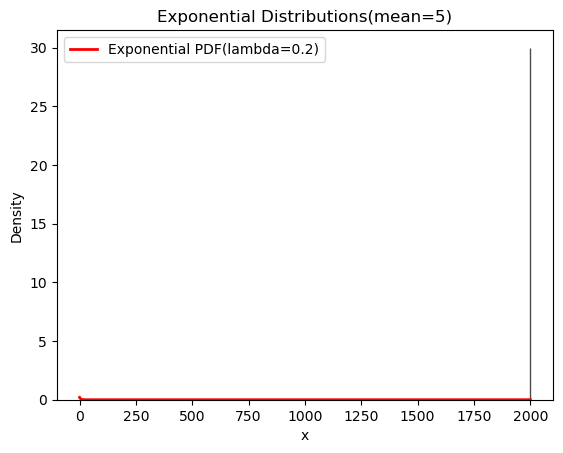

In [13]:
#5
import numpy as np
import matplotlib.pyplot as plt

#parameters
mean = 5
lam = 1/mean
n_samples = 2000

#Generate samples
np.random.exponential(scale=mean , size=n_samples)

#visualization
#Histogram of samples
count , bins , patches = plt.hist(n_samples,bins=30 ,density=True,alpha=0.7,color="skyblue",edgecolor="black")

#pdf overlay
x = np.linspace(0,np.max(n_samples),1000)
pdf = lam*np.exp(-lam * x)
plt.plot(x,pdf,'r-',lw=2,label="Exponential PDF(lambda=0.2)")

#Formatting
plt.title("Exponential Distributions(mean=5)")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.show()

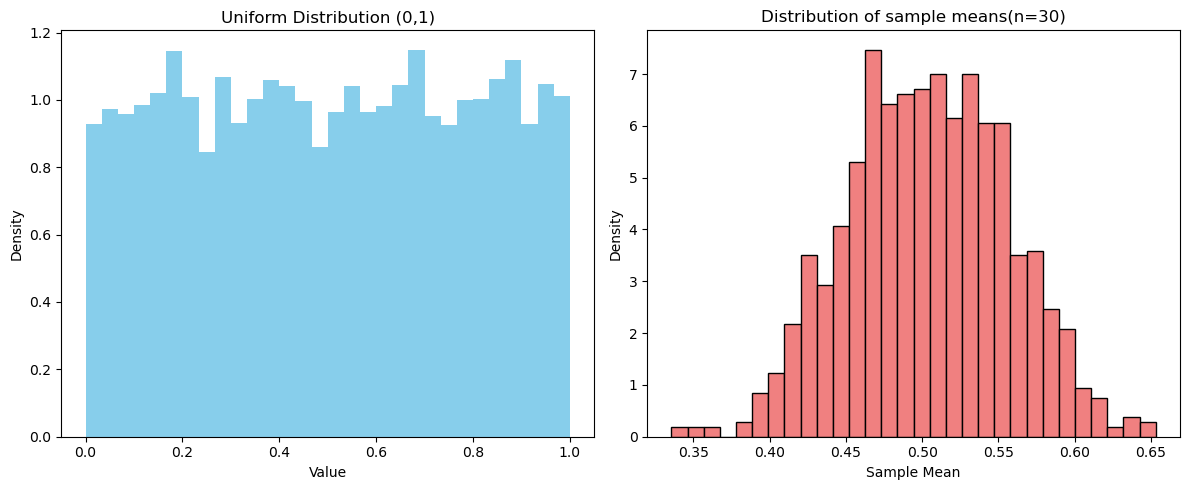

In [1]:
#6
import numpy as np
import matplotlib.pyplot as plt

#generate uniform random numbers
uniform_data = np.random.uniform(0,1,10000)

#Draw 1000 samples of size n=30
n = 30
n_samples = 1000
sample_means = []

for _ in range(n_samples):
    sample = np.random.choice(uniform_data , size = n , replace=True)
    sample_means.append(np.mean(sample))
sample_means = np.array(sample_means)

#visualization

plt.figure(figsize=(12,5))

#Original uniform distributions
plt.subplot(1,2,1)
plt.hist(uniform_data , bins=30 ,density=True ,color="skyblue")
plt.title("Uniform Distribution (0,1)")
plt.xlabel("Value")
plt.ylabel("Density")

#Distribution of sample means
plt.subplot(1,2,2)
plt.hist(sample_means,bins=30,density=True,color="lightcoral",edgecolor="black")
plt.title("Distribution of sample means(n=30)")
plt.xlabel("Sample Mean")
plt.ylabel("Density")
plt.tight_layout()
plt.show()
